http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 


#### This version is the same as the public availble version for getting started with pandas, but with edits, comments, and some small addions for the Data-X course at Berkeley.  Edited, Ikhlaq Sidhu, Jan 2017

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this line makes plots/graphs appear within the notebook
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
# This is a series, its like an array but with an index
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
# We will look at the time series index separately, but its also in this notebook.
dates = pd.date_range('20130101', periods=6)

In [7]:
# dates is a time series object used as an index
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
# The DataFrame below is from an np.array and column list
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [9]:
df

,A,B,C,D
2013-01-01,-0.056049,0.113105,1.806817,1.134625
2013-01-02,-1.611736,0.997774,0.784872,-0.940363
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562
2013-01-04,0.446995,0.936141,0.098400,0.157782
2013-01-05,-1.196693,0.307608,0.502415,0.474626
2013-01-06,-1.201172,-0.977452,1.113112,-0.110576


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [11]:
# See below that all the columns can be different types, created from a dictionary.
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [12]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [14]:
# type for each column
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [15]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [17]:
# as before, head(n) gives you the first n rows, defaults to 5
df.head()

,A,B,C,D
2013-01-01,-0.056049,0.113105,1.806817,1.134625
2013-01-02,-1.611736,0.997774,0.784872,-0.940363
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562
2013-01-04,0.446995,0.936141,0.098400,0.157782
2013-01-05,-1.196693,0.307608,0.502415,0.474626


In [18]:
df.tail(3)

,A,B,C,D
2013-01-04,0.446995,0.936141,0.098400,0.157782
2013-01-05,-1.196693,0.307608,0.502415,0.474626
2013-01-06,-1.201172,-0.977452,1.113112,-0.110576


Display the index, columns, and the underlying numpy data

In [22]:
# if you want the index by itelf, use .index
df.index
# df.index[2:4]

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [30]:
# Here is a list of the columns
df.columns
#df.columns[2]
#df.columns[2:4]

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [33]:
# df.values extracts only the data in np.array
df.values

array([[-0.05604925,  0.11310545,  1.80681672,  1.13462519],
       [-1.61173602,  0.9977742 ,  0.78487201, -0.9403629 ],
       [ 1.25756686, -0.38120917, -0.22615913, -0.32956158],
       [ 0.44699525,  0.93614083,  0.09839975,  0.15778227],
       [-1.19669263,  0.30760802,  0.50241478,  0.47462582],
       [-1.20117164, -0.97745235,  1.11311156, -0.11057567]])

Describe shows a quick statistic summary of your data

In [51]:
# A quick way to get statistics
df.describe()
# df.describe()['A'][1]
# df.describe()[2:3]

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.393515,0.165994,0.679909,0.064422
std,1.124978,0.763510,0.729276,0.709614
min,-1.611736,-0.977452,-0.226159,-0.940363
25%,-1.200052,-0.257631,0.199404,-0.274815
50%,-0.626371,0.210357,0.643643,0.023603
75%,0.321234,0.779008,1.031052,0.395415
max,1.257567,0.997774,1.806817,1.134625


Transposing your data

In [54]:
# yes, this is the pandas method
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.056049,-1.611736,1.257567,0.446995,-1.196693,-1.201172
B,0.113105,0.997774,-0.381209,0.936141,0.307608,-0.977452
C,1.806817,0.784872,-0.226159,0.098400,0.502415,1.113112
D,1.134625,-0.940363,-0.329562,0.157782,0.474626,-0.110576


Sorting by an axis

In [60]:
# recall df
df

,A,B,C,D
2013-01-01,-0.056049,0.113105,1.806817,1.134625
2013-01-02,-1.611736,0.997774,0.784872,-0.940363
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562
2013-01-04,0.446995,0.936141,0.098400,0.157782
2013-01-05,-1.196693,0.307608,0.502415,0.474626
2013-01-06,-1.201172,-0.977452,1.113112,-0.110576


In [63]:
# See that its using the header to sort
df.sort_index(axis=1, ascending=False)
# try df[2:3].sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.134625,1.806817,0.113105,-0.056049
2013-01-02,-0.940363,0.784872,0.997774,-1.611736
2013-01-03,-0.329562,-0.226159,-0.381209,1.257567
2013-01-04,0.157782,0.098400,0.936141,0.446995
2013-01-05,0.474626,0.502415,0.307608,-1.196693
2013-01-06,-0.110576,1.113112,-0.977452,-1.201172


Sorting by value

In [64]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-1.201172,-0.977452,1.113112,-0.110576
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562
2013-01-01,-0.056049,0.113105,1.806817,1.134625
2013-01-05,-1.196693,0.307608,0.502415,0.474626
2013-01-04,0.446995,0.936141,0.098400,0.157782
2013-01-02,-1.611736,0.997774,0.784872,-0.940363


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [65]:
df['A']

2013-01-01   -0.056049
2013-01-02   -1.611736
2013-01-03    1.257567
2013-01-04    0.446995
2013-01-05   -1.196693
2013-01-06   -1.201172
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [69]:
# A slice: by rows (row numbers)
df[1:3]

,A,B,C,D
2013-01-02,-1.611736,0.997774,0.784872,-0.940363
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562


In [68]:
# A slice: by rows (by range of values in index)
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.611736,0.997774,0.784872,-0.940363
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562
2013-01-04,0.446995,0.936141,0.098400,0.157782


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [74]:
# Introduce loc: this will get you a cross section of the table by label ran
# df.loc[a:b, x:y], by rows and column location

df.loc['20130102':'20130104','B':'D']
#df.loc[dates[0]]

# df[0:1]
# df[a:b] by rows
# df[[col]] or df[[list of col]] by columns
# df.loc[a:b, x:y], by rows and column location
# df.iloc[3:5,0:2], by slicing by specific position

,B,C,D
2013-01-02,0.997774,0.784872,-0.940363
2013-01-03,-0.381209,-0.226159,-0.329562
2013-01-04,0.936141,0.098400,0.157782


Selection by Label

In [75]:
#In this case, the columns are in a list
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.056049,0.113105
2013-01-02,-1.611736,0.997774
2013-01-03,1.257567,-0.381209
2013-01-04,0.446995,0.936141
2013-01-05,-1.196693,0.307608
2013-01-06,-1.201172,-0.977452


Showing label slicing, both endpoints are included

In [77]:
# more slicng with loc
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.611736,0.997774
2013-01-03,1.257567,-0.381209
2013-01-04,0.446995,0.936141


Reduction in the dimensions of the returned object

In [79]:

df.loc['20130102',['A','B']]

A   -1.611736
B    0.997774
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [81]:
# or get just one value
df.loc[dates[0],'A']

-0.056049253863186148

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [84]:
# recall df
df

,A,B,C,D
2013-01-01,-0.056049,0.113105,1.806817,1.134625
2013-01-02,-1.611736,0.997774,0.784872,-0.940363
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562
2013-01-04,0.446995,0.936141,0.098400,0.157782
2013-01-05,-1.196693,0.307608,0.502415,0.474626
2013-01-06,-1.201172,-0.977452,1.113112,-0.110576


In [85]:
# Introduce iloc: its like loc, but uses index position instead
df.iloc[3]

A    0.446995
B    0.936141
C    0.098400
D    0.157782
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [87]:
# Get a cross section by index positions
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.446995,0.936141
2013-01-05,-1.196693,0.307608


By lists of integer position locations, similar to the numpy/python style

In [89]:
# iloc will accept lists of position numbers
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.611736,0.784872
2013-01-03,1.257567,-0.226159
2013-01-05,-1.196693,0.502415


For slicing rows explicitly

In [90]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.611736,0.997774,0.784872,-0.940363
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562


For slicing columns explicitly

In [91]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.113105,1.806817
2013-01-02,0.997774,0.784872
2013-01-03,-0.381209,-0.226159
2013-01-04,0.936141,0.098400
2013-01-05,0.307608,0.502415
2013-01-06,-0.977452,1.113112


For getting a value explicitly

In [92]:
df.iloc[1,1]

0.99777420156629049

For getting fast access to a scalar (equiv to the prior method)

In [94]:
# same as above but faster for one single scaler value
df.iat[1,1]

0.99777420156629049

## Boolean Indexing

Using a single column’s values to select data.

In [161]:
print df

# this will be only the rows where the A column is > 0
print df[df.A > 0]
print

# same result
print df['A'] > 0
print df[df['A'] > 0]

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  1.806817  5  NaN
2013-01-02 -1.611736  0.997774  0.784872  5  1.0
2013-01-03  1.257567 -0.381209 -0.226159  5  2.0
2013-01-04  0.446995  0.936141  0.098400  5  3.0
2013-01-05 -1.196693  0.307608  0.502415  5  4.0
2013-01-06 -1.201172 -0.977452  1.113112  5  5.0
                   A         B         C  D    F
2013-01-03  1.257567 -0.381209 -0.226159  5  2.0
2013-01-04  0.446995  0.936141  0.098400  5  3.0

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04     True
2013-01-05    False
2013-01-06    False
Freq: D, Name: A, dtype: bool
                   A         B         C  D    F
2013-01-03  1.257567 -0.381209 -0.226159  5  2.0
2013-01-04  0.446995  0.936141  0.098400  5  3.0


A where operation for getting.

In [102]:
# Try this to see which elements are > 0
print df > 0
# The show only those values
df[df > 0]

                A      B      C      D
2013-01-01  False   True   True   True
2013-01-02  False   True   True  False
2013-01-03   True  False  False  False
2013-01-04   True   True   True   True
2013-01-05  False   True   True   True
2013-01-06  False  False   True  False


,A,B,C,D
2013-01-01,NaN,0.113105,1.806817,1.134625
2013-01-02,NaN,0.997774,0.784872,NaN
2013-01-03,1.257567,NaN,NaN,NaN
2013-01-04,0.446995,0.936141,0.098400,0.157782
2013-01-05,NaN,0.307608,0.502415,0.474626
2013-01-06,NaN,NaN,1.113112,NaN


Using the isin() method for filtering:

In [103]:
df2 = df.copy()

In [104]:
# We are about to add a new column to df2
df2['E'] = ['one','one', 'two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,-0.197263,-0.535292,-0.248497,1.265417,one
2013-01-02,0.701889,0.606479,-3.644729,1.751445,one
2013-01-03,-0.204518,2.126831,-0.632311,-0.435404,two
2013-01-04,-2.227587,-0.093817,0.277722,1.608733,three
2013-01-05,-0.522452,-1.765425,1.602216,0.023162,four
2013-01-06,-0.364047,0.413232,-0.469531,1.860893,three


In [110]:
# We use isin to get only the rows that have 'two' and 'four'
print df2['E'].isin(['two','four'])

df2[df2['E'].isin(['two','four'])]




2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool


,A,B,C,D,E
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562,two
2013-01-05,-1.196693,0.307608,0.502415,0.474626,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [111]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [162]:
# Many of the same indexing and slicing methods can be used also to set data
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.806817,5,NaN
2013-01-02,-1.611736,0.997774,0.784872,5,1.0
2013-01-03,1.257567,-0.381209,-0.226159,5,2.0
2013-01-04,0.446995,0.936141,0.098400,5,3.0
2013-01-05,-1.196693,0.307608,0.502415,5,4.0
2013-01-06,-1.201172,-0.977452,1.113112,5,5.0


Setting values by label

In [115]:
# look at the first row and column
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.113105,1.806817,1.134625,NaN
2013-01-02,-1.611736,0.997774,0.784872,-0.940363,1.0
2013-01-03,1.257567,-0.381209,-0.226159,-0.329562,2.0
2013-01-04,0.446995,0.936141,0.098400,0.157782,3.0
2013-01-05,-1.196693,0.307608,0.502415,0.474626,4.0
2013-01-06,-1.201172,-0.977452,1.113112,-0.110576,5.0


Setting values by position

In [163]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.806817,5,NaN
2013-01-02,-1.611736,0.997774,0.784872,5,1.0
2013-01-03,1.257567,-0.381209,-0.226159,5,2.0
2013-01-04,0.446995,0.936141,0.098400,5,3.0
2013-01-05,-1.196693,0.307608,0.502415,5,4.0
2013-01-06,-1.201172,-0.977452,1.113112,5,5.0


Setting by assigning with a numpy array

In [118]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.806817,5,NaN
2013-01-02,-1.611736,0.997774,0.784872,5,1.0
2013-01-03,1.257567,-0.381209,-0.226159,5,2.0
2013-01-04,0.446995,0.936141,0.098400,5,3.0
2013-01-05,-1.196693,0.307608,0.502415,5,4.0
2013-01-06,-1.201172,-0.977452,1.113112,5,5.0


The result of the prior setting operations

In [119]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.806817,5,NaN
2013-01-02,-1.611736,0.997774,0.784872,5,1.0
2013-01-03,1.257567,-0.381209,-0.226159,5,2.0
2013-01-04,0.446995,0.936141,0.098400,5,3.0
2013-01-05,-1.196693,0.307608,0.502415,5,4.0
2013-01-06,-1.201172,-0.977452,1.113112,5,5.0


A where operation with setting.

In [129]:
# making a copy
df2 = df.copy()
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.806817,5,NaN
2013-01-02,-1.611736,0.997774,0.784872,5,1.0
2013-01-03,1.257567,-0.381209,-0.226159,5,2.0
2013-01-04,0.446995,0.936141,0.098400,5,3.0
2013-01-05,-1.196693,0.307608,0.502415,5,4.0
2013-01-06,-1.201172,-0.977452,1.113112,5,5.0


In [131]:
# change the sign of values where df<0
dfx = df2[df2 < 0] = -df2
dfx

,A,B,C,D,F
2013-01-01,-0.000000,-0.000000,1.806817,5.0,NaN
2013-01-02,1.611736,0.997774,0.784872,5.0,1.0
2013-01-03,1.257567,0.381209,0.226159,5.0,2.0
2013-01-04,0.446995,0.936141,0.098400,5.0,3.0
2013-01-05,1.196693,0.307608,0.502415,5.0,4.0
2013-01-06,1.201172,0.977452,1.113112,5.0,5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [142]:
# df1 will have a new index and a new column E
print df
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  1.806817  5  NaN
2013-01-02 -1.611736  0.997774  0.784872  5  1.0
2013-01-03  1.257567 -0.381209 -0.226159  5  2.0
2013-01-04  0.446995  0.936141  0.098400  5  3.0
2013-01-05 -1.196693  0.307608  0.502415  5  4.0
2013-01-06 -1.201172 -0.977452  1.113112  5  5.0


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.806817,5,NaN,NaN
2013-01-02,-1.611736,0.997774,0.784872,5,1.0,NaN
2013-01-03,1.257567,-0.381209,-0.226159,5,2.0,NaN
2013-01-04,0.446995,0.936141,0.098400,5,3.0,NaN


In [146]:
# Set E in the first 2 rows
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.806817,5,NaN,1.0
2013-01-02,-1.611736,0.997774,0.784872,5,1.0,1.0
2013-01-03,1.257567,-0.381209,-0.226159,5,2.0,NaN
2013-01-04,0.446995,0.936141,0.098400,5,3.0,NaN


To drop any rows that have missing data.

In [147]:
# A view where we drop any rows with value NnN
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-1.611736,0.997774,0.784872,5,1.0,1.0


Filling missing data

In [148]:
# fill NaN values with 5
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.806817,5,5.0,1.0
2013-01-02,-1.611736,0.997774,0.784872,5,1.0,1.0
2013-01-03,1.257567,-0.381209,-0.226159,5,2.0,5.0
2013-01-04,0.446995,0.936141,0.098400,5,3.0,5.0


To get the boolean mask where values are nan

In [151]:
# returns a boolean mask for null entries
print df1
pd.isnull(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  1.806817  5  NaN  1.0
2013-01-02 -1.611736  0.997774  0.784872  5  1.0  1.0
2013-01-03  1.257567 -0.381209 -0.226159  5  2.0  NaN
2013-01-04  0.446995  0.936141  0.098400  5  3.0  NaN


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [152]:
df.mean()

A   -0.384173
B    0.147144
C    0.679909
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [153]:
df.mean(1)
# df.mean(axis = 1)

2013-01-01    1.701704
2013-01-02    1.234182
2013-01-03    1.530040
2013-01-04    1.896307
2013-01-05    1.722666
2013-01-06    1.786898
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [155]:
# This Series has 2 rows shifted down with NaN inserted into the first positions
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [156]:
print df
df.sub(s, axis='index')

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  1.806817  5  NaN
2013-01-02 -1.611736  0.997774  0.784872  5  1.0
2013-01-03  1.257567 -0.381209 -0.226159  5  2.0
2013-01-04  0.446995  0.936141  0.098400  5  3.0
2013-01-05 -1.196693  0.307608  0.502415  5  4.0
2013-01-06 -1.201172 -0.977452  1.113112  5  5.0


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.257567,-1.381209,-1.226159,4.0,1.0
2013-01-04,-2.553005,-2.063859,-2.901600,2.0,0.0
2013-01-05,-6.196693,-4.692392,-4.497585,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [164]:
# apply below will operate on every column
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.806817,5,NaN
2013-01-02,-1.611736,0.997774,2.591689,10,1.0
2013-01-03,-0.354169,0.616565,2.365530,15,3.0
2013-01-04,0.092826,1.552706,2.463929,20,6.0
2013-01-05,-1.103867,1.860314,2.966344,25,10.0
2013-01-06,-2.305038,0.882862,4.079456,30,15.0


In [165]:
df.apply(lambda x: x.max() - x.min())

A    2.869303
B    1.975227
C    2.032976
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    0
1    5
2    3
3    3
4    1
5    1
6    5
7    2
8    6
9    6
dtype: int64

In [68]:
s.value_counts()

6    2
5    2
3    2
1    2
2    1
0    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,-0.912351,1.134999,1.570026,0.287990
1,0.589466,-0.190945,1.370336,-0.789849
2,0.592985,-0.202789,0.643666,1.369117
3,-1.089340,-0.149526,1.695424,0.333854
4,0.307840,-0.772779,1.033580,-0.294381
5,-1.760446,0.937543,-0.963478,-0.513696
6,-0.359911,1.071520,1.216297,0.180144
7,0.094108,-0.016260,0.056992,-0.982665
8,-0.566086,-0.068951,-0.877895,0.556712
9,2.620462,-0.908679,0.170727,-1.617794


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-0.912351,1.134999,1.570026,0.287990
1,0.589466,-0.190945,1.370336,-0.789849
2,0.592985,-0.202789,0.643666,1.369117
3,-1.089340,-0.149526,1.695424,0.333854
4,0.307840,-0.772779,1.033580,-0.294381
5,-1.760446,0.937543,-0.963478,-0.513696
6,-0.359911,1.071520,1.216297,0.180144
7,0.094108,-0.016260,0.056992,-0.982665
8,-0.566086,-0.068951,-0.877895,0.556712
9,2.620462,-0.908679,0.170727,-1.617794


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,-2.338760,-1.018224,-0.611879,-0.587383
1,-0.039695,-0.154699,0.079205,-0.035886
2,-0.283191,0.285702,-0.177071,-1.004003
3,0.191278,1.461646,0.483298,-0.950242
4,0.881973,0.185000,0.830654,0.745786
5,0.830493,-0.869381,-2.375939,0.190431
6,-0.540258,1.032857,-1.230487,1.655093
7,-1.403527,-0.962164,0.405885,-0.782047


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-2.338760,-1.018224,-0.611879,-0.587383
1,-0.039695,-0.154699,0.079205,-0.035886
2,-0.283191,0.285702,-0.177071,-1.004003
3,0.191278,1.461646,0.483298,-0.950242
4,0.881973,0.185000,0.830654,0.745786
5,0.830493,-0.869381,-2.375939,0.190431
6,-0.540258,1.032857,-1.230487,1.655093
7,-1.403527,-0.962164,0.405885,-0.782047
8,0.191278,1.461646,0.483298,-0.950242


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,0.852804,-1.187662
1,bar,one,-0.068201,-0.222735
2,foo,two,-1.766846,1.140940
3,bar,three,0.579536,0.053216
4,foo,two,0.262989,0.140463
5,bar,two,-1.194355,-0.796773
6,foo,one,-1.108675,1.148208
7,foo,three,1.576263,-0.451736


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.683021,-0.966293
foo,-0.183464,0.790213


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.068201 -0.222735
    three  0.579536  0.053216
    two   -1.194355 -0.796773
foo one   -0.255870 -0.039454
    three  1.576263 -0.451736
    two   -1.503857  1.281403

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one    -0.115464  0.546322
      two    -0.424864 -1.090883
baz   one     1.046604  2.379343
      two    -0.369638 -0.318320

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A   -0.115464
               B    0.546322
       two     A   -0.424864
               B   -1.090883
baz    one     A    1.046604
               B    2.379343
       two     A   -0.369638
               B   -0.318320
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one    -0.115464  0.546322
      two    -0.424864 -1.090883
baz   one     1.046604  2.379343
      two    -0.369638 -0.318320

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.115464 -0.424864
      B  0.546322 -1.090883
baz   A  1.046604 -0.369638
      B  2.379343 -0.318320

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.115464  1.046604
       B  0.546322  2.379343
two    A -0.424864 -0.369638
       B -1.090883 -0.318320

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [168]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [169]:
df

,A,B,C,D,E
0,one,A,foo,0.433237,0.687019
1,one,B,foo,-0.525811,-0.826010
2,two,C,foo,-0.439642,0.007635
3,three,A,bar,-0.067626,-0.502727
4,one,B,bar,2.724485,0.252883
5,one,C,bar,-0.187220,-0.151659
6,two,A,foo,0.503259,0.039821
7,three,B,foo,-1.316848,0.315566
8,one,C,foo,3.073317,-1.366196
9,one,A,bar,-2.109088,-1.187493


We can produce pivot tables from this data very easily:

In [170]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -2.109088  0.433237
      B  2.724485 -0.525811
      C -0.187220  3.073317
three A -0.067626       NaN
      B       NaN -1.316848
      C  0.191688       NaN
two   A       NaN  0.503259
      B  1.624533       NaN
      C       NaN -0.439642

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    27385
Freq: 5T, dtype: int64

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06    0.292464
2012-03-07    1.056956
2012-03-08    0.596228
2012-03-09   -0.139904
2012-03-10    0.633394
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00    0.292464
2012-03-07 00:00:00+00:00    1.056956
2012-03-08 00:00:00+00:00    0.596228
2012-03-09 00:00:00+00:00   -0.139904
2012-03-10 00:00:00+00:00    0.633394
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.292464
2012-03-06 19:00:00-05:00    1.056956
2012-03-07 19:00:00-05:00    0.596228
2012-03-08 19:00:00-05:00   -0.139904
2012-03-09 19:00:00-05:00    0.633394
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31   -0.691981
2012-02-29   -0.371446
2012-03-31    0.435391
2012-04-30   -0.259256
2012-05-31    0.310345
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01   -0.691981
2012-02   -0.371446
2012-03    0.435391
2012-04   -0.259256
2012-05    0.310345
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01   -0.691981
2012-02-01   -0.371446
2012-03-01    0.435391
2012-04-01   -0.259256
2012-05-01    0.310345
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00   -0.424504
1990-06-01 09:00    1.353002
1990-09-01 09:00    0.057702
1990-12-01 09:00   -1.289890
1991-03-01 09:00   -1.637750
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [129]:
ts = ts.cumsum()

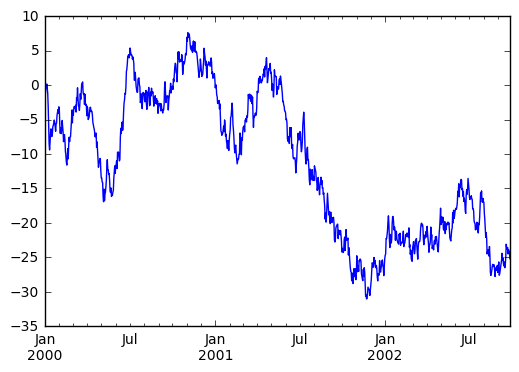

In [130]:
# plot a series almost automatically
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [132]:
df = df.cumsum()

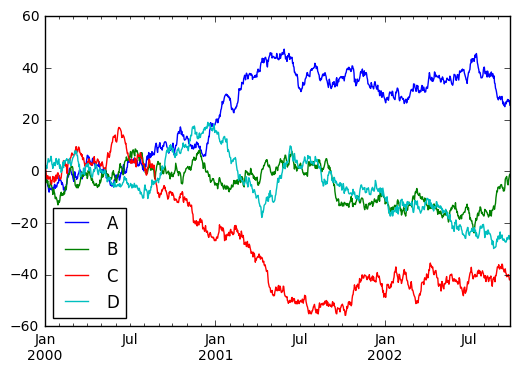

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [134]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.854547,0.447559,-0.134912,-0.164443
1,2000-01-02,-1.630824,-0.383058,1.006201,1.122183
2,2000-01-03,-2.030085,-1.832851,0.239369,1.364488
3,2000-01-04,-3.082157,-2.137121,-1.961715,2.013433
4,2000-01-05,-3.239785,-3.980219,-2.905007,1.037357
5,2000-01-06,-3.684050,-4.555034,-2.868334,2.616164
6,2000-01-07,-5.745733,-3.731251,-1.738356,3.536241
7,2000-01-08,-5.934340,-5.602300,-2.664696,4.892142
8,2000-01-09,-7.364158,-5.526932,-3.064157,4.203635
9,2000-01-10,-8.090153,-6.366834,-2.731236,3.558414


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [136]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [137]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.854547,0.447559,-0.134912,-0.164443
2000-01-02,-1.630824,-0.383058,1.006201,1.122183
2000-01-03,-2.030085,-1.832851,0.239369,1.364488
2000-01-04,-3.082157,-2.137121,-1.961715,2.013433
2000-01-05,-3.239785,-3.980219,-2.905007,1.037357
2000-01-06,-3.684050,-4.555034,-2.868334,2.616164
2000-01-07,-5.745733,-3.731251,-1.738356,3.536241
2000-01-08,-5.934340,-5.602300,-2.664696,4.892142
2000-01-09,-7.364158,-5.526932,-3.064157,4.203635
2000-01-10,-8.090153,-6.366834,-2.731236,3.558414


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [138]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [139]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.854547,0.447559,-0.134912,-0.164443
2000-01-02,-1.630824,-0.383058,1.006201,1.122183
2000-01-03,-2.030085,-1.832851,0.239369,1.364488
2000-01-04,-3.082157,-2.137121,-1.961715,2.013433
2000-01-05,-3.239785,-3.980219,-2.905007,1.037357
2000-01-06,-3.684050,-4.555034,-2.868334,2.616164
2000-01-07,-5.745733,-3.731251,-1.738356,3.536241
2000-01-08,-5.934340,-5.602300,-2.664696,4.892142
2000-01-09,-7.364158,-5.526932,-3.064157,4.203635
2000-01-10,-8.090153,-6.366834,-2.731236,3.558414


### Gotchas
If you are trying an operation and you see an exception like:

In [140]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.